In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn==1.3.0

In [3]:
df = pd.read_csv("Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Preprocessing data

In [6]:
# CONVERTING ALL OUR CATEGORICAL DATA COLUMNS TO NUMERIC FORM

from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Data Analysis

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

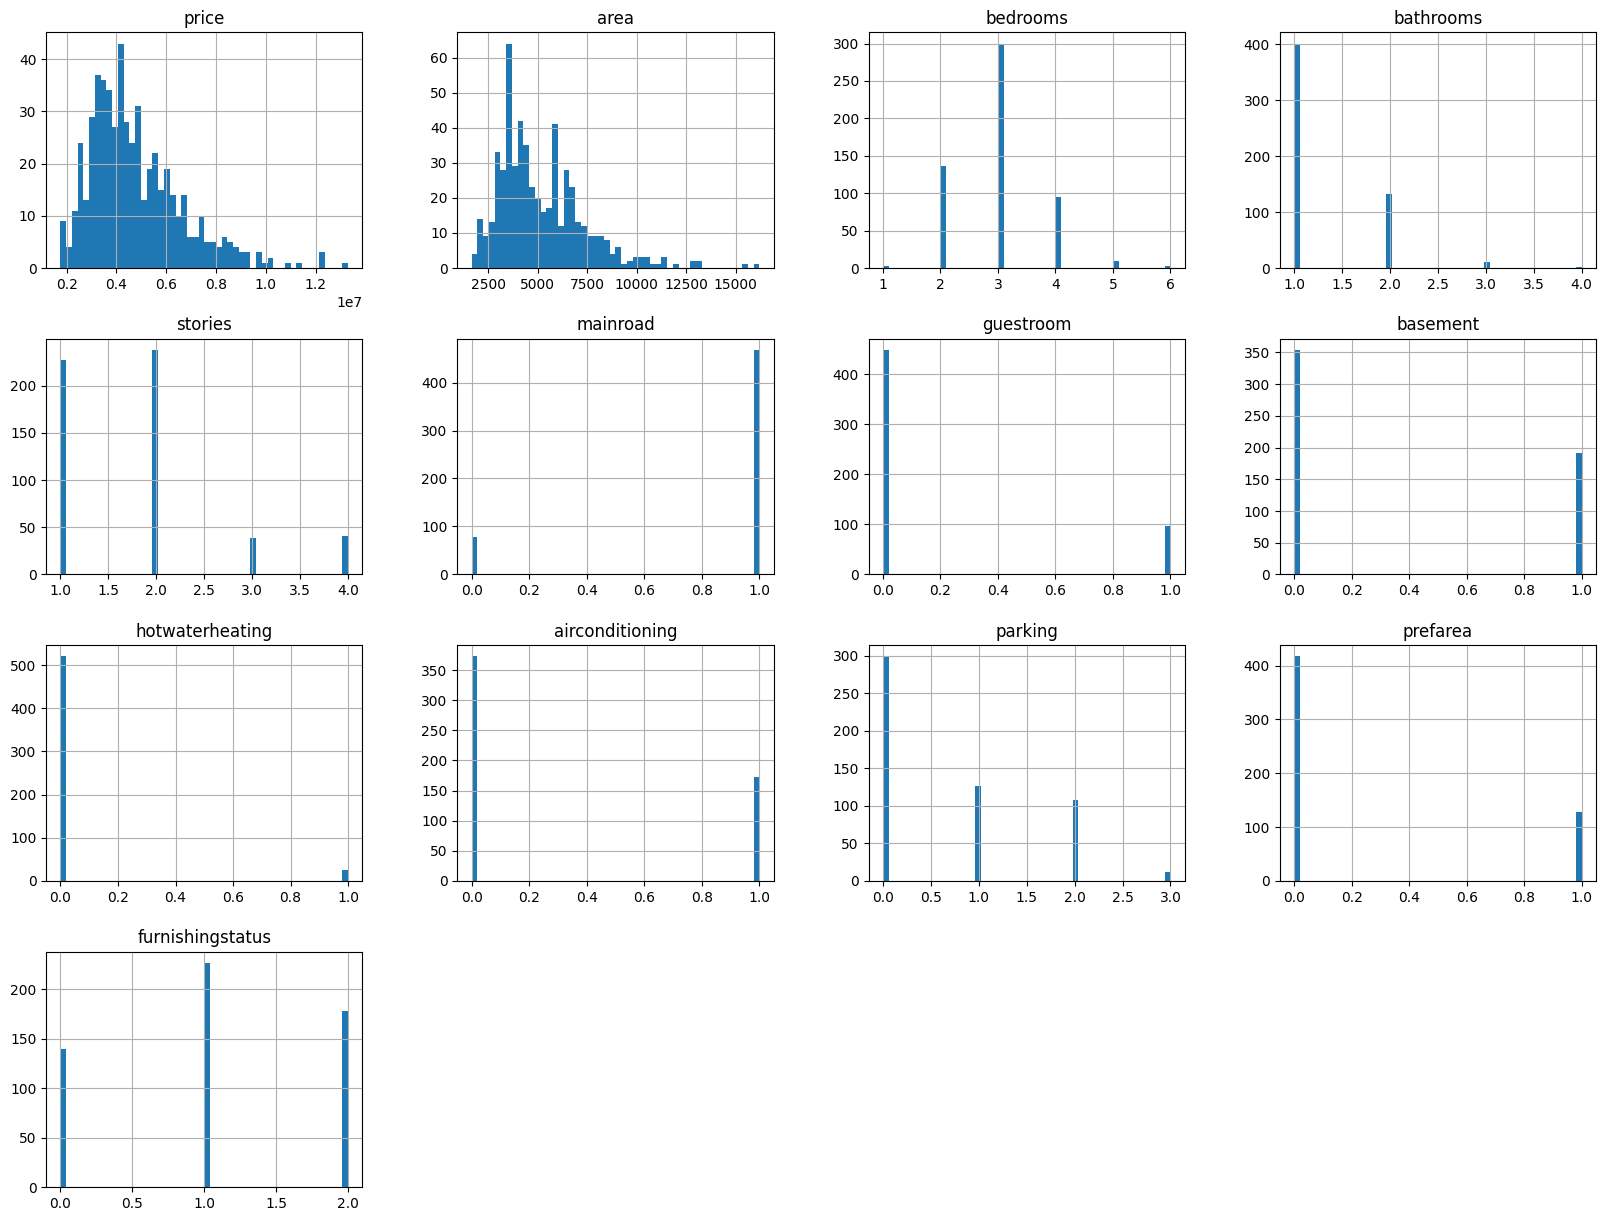

In [8]:
df.hist(bins=50,figsize=(20,15))

## Corelation matrix

<Axes: >

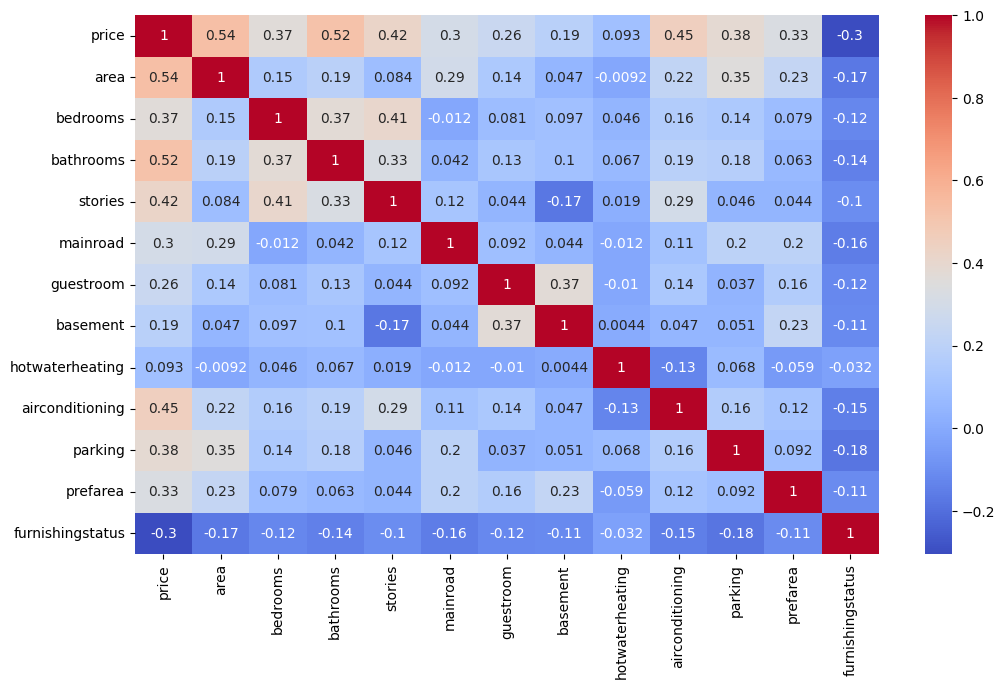

In [9]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

## Model Training and Testing

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'],axis=1)
Y = df['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

## Linear Regression

In [11]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Linear Regression Accuracy: ',model.score(x_test,y_test)*100)

Linear Regression Accuracy:  61.3147341122154


In [12]:
#Model Training
model.fit(x_train.values,y_train.values)

LinearRegression()

In [13]:
#Print Metric to get the performance
print('Accuracy: ',model.score(x_test,y_test)*100)

Accuracy:  61.3147341122154


In [14]:
# PREDICTING THE OUTCOMES

y_predict = model.predict(x_test)

In [15]:
y_predict

array([2998723.70321099, 7753624.73924017, 3671399.55478306,
       5329014.45726882, 5810975.10352434, 6683919.1585371 ,
       2926904.47364702, 6180240.31264123, 3695038.9422093 ,
       4560448.99222314, 4493489.13341087, 2460775.71311864,
       5481008.87251837, 4298469.3966349 , 5569216.16278566,
       6586314.7741234 , 4050117.95776544, 2889718.25734855,
       2515176.95759882, 3650434.54127572, 4055052.73207435,
       2354946.0156316 , 3344375.79859974, 4794647.57468505,
       3579096.4642053 , 5364297.06723651, 4685353.92038152,
       4305808.32604948, 5608396.71941376, 3673616.77937195,
       3336669.13465655, 5232116.83588285, 6629110.52767068,
       4931639.37691554, 5291090.17998227, 6767296.81012934,
       3451641.10311427, 6652669.60972079, 5277225.32327853,
       5833399.48856786, 5877652.24170848, 5134733.64093876,
       4740703.06958838, 4707169.39110455, 3856892.0912913 ,
       3318089.34204729, 3791182.54325075, 5424212.25018914,
       2757241.68854902,

## Evaluation

In [16]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [17]:
score

0.613147341122154

In [18]:
mae

892363.547250204

## Saving the File

In [19]:
import pickle
filename = 'Housing_model.sav'
pickle.dump(model,open(filename,'wb'))

In [20]:
#loading Model
load_model = pickle.load(open(filename,'rb'))

In [21]:
x_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
503,4000,3,1,1,1,0,0,0,0,0,0,1
220,8100,4,1,4,1,0,1,0,1,2,0,1
520,7700,2,1,1,1,0,0,0,0,0,0,2
356,2520,5,2,1,0,0,1,0,1,1,0,0
149,6600,4,2,1,1,0,1,0,0,0,1,1


In [22]:
load_model.predict([[5400,3,1,1,1,0,0,0,0,3,0,1]])

array([4304653.33064679])